# **Technocolab project**
## Luv Gupta 

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Gathering, Accessing and Cleaning of Data 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/techno/Lending_Club_Loan_approval_Optimization.csv")

In [ ]:
df.head(2)

,Unnamed: 0,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
0,0,3600.0,677.0,5.91,10,1
1,1,24700.0,717.0,16.06,10,1


In [ ]:
#Drop 1st column
df=df.iloc[:,1:]

In [ ]:
df.head(2)

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
0,3600.0,677.0,5.91,10,1
1,24700.0,717.0,16.06,10,1


In [ ]:
df.shape

(2072806, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072806 entries, 0 to 2072805
Data columns (total 5 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Risk_Score            float64
 2   Debt-To-Income Ratio  float64
 3   Employment Length     int64  
 4   Target                int64  
dtypes: float64(3), int64(2)
memory usage: 79.1 MB


In [ ]:
df.describe()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
count,2.072806e+06,2.072806e+06,2.072806e+06,2.072806e+06,2072806.0
mean,1.293403e+04,6.560779e+02,1.173645e+02,3.738213e+00,0.5
std,9.483082e+03,8.573350e+01,4.757285e+03,4.046339e+00,0.5
min,2.000000e+02,0.000000e+00,-1.000000e+00,0.000000e+00,0.0
25%,5.000000e+03,6.130000e+02,1.108000e+01,0.000000e+00,0.0
50%,1.000000e+04,6.720000e+02,1.859000e+01,2.000000e+00,0.5
75%,1.920000e+04,7.020000e+02,2.807000e+01,8.000000e+00,1.0
max,1.400000e+06,9.900000e+02,2.376000e+06,1.000000e+01,1.0


In [ ]:
x=df.columns
df.rename(columns={"Amount Requested":"Amount_Requested", "Debt-To-Income Ratio":"Debt_To_Income_Ratio", "Employment Length": "Employment_Length"}, inplace=True)

In [ ]:
df.head(2)

,Amount_Requested,Risk_Score,Debt_To_Income_Ratio,Employment_Length,Target
0,3600.0,677.0,5.91,10,1
1,24700.0,717.0,16.06,10,1


In [ ]:
df.isnull().sum()
#No null in any column

Amount_Requested        0
Risk_Score              0
Debt_To_Income_Ratio    0
Employment_Length       0
Target                  0
dtype: int64

In [ ]:
df.duplicated().sum()

119097

In [ ]:
#Drop duplicated Data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.corr()

,Amount_Requested,Risk_Score,Debt_To_Income_Ratio,Employment_Length,Target
Amount_Requested,1.000000,0.236394,0.004164,0.131121,0.067286
Risk_Score,0.236394,1.000000,-0.007817,0.470663,0.565188
Debt_To_Income_Ratio,0.004164,-0.007817,1.000000,-0.018429,-0.020661
Employment_Length,0.131121,0.470663,-0.018429,1.000000,0.536448
Target,0.067286,0.565188,-0.020661,0.536448,1.000000


# Exploratory Data Analysis:

Co-relation Matrix

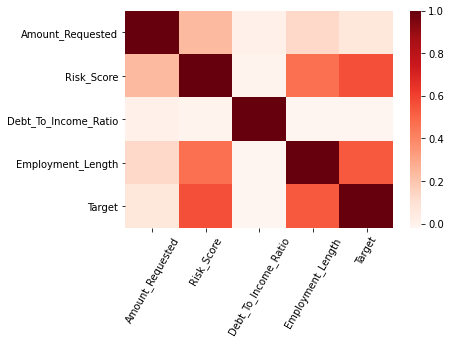

In [ ]:
sns.heatmap(df.corr(), cmap="Reds");
plt.xticks(rotation=60);

In [ ]:
#sns.pairplot(data=df)
#Takes huge time to run

## Univariate Exploration

### Amount Requested

In [ ]:
df.query("Amount_Requested < 45000").size / df.size

0.9998541236182051

99 % of data have Amount_Requested less than 45000.
We are going to observe this 99% of data through histogram.

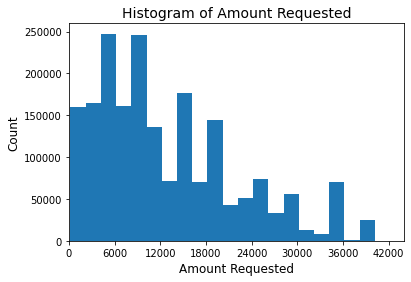

In [ ]:
bins=np.arange(df['Amount_Requested'].min(), df['Amount_Requested'].max()+2000, 2000)
plt.hist(data=df, x="Amount_Requested", bins=bins);
plt.xlim(0, 44000)
plt.xticks(np.arange(0, 43000, 6000));
plt.ylabel("Count", size=12)
plt.xlabel("Amount Requested", size=12)
plt.title("Histogram of Amount Requested", size=14);

### Risk Score

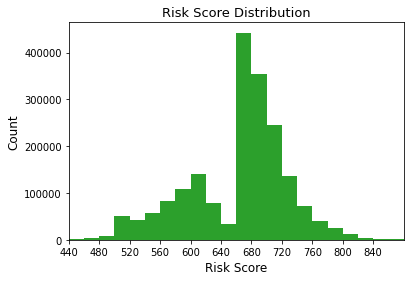

In [ ]:
bins=np.arange(df['Risk_Score'].min(), df['Risk_Score'].max()+20, 20)
plt.hist(data=df, x="Risk_Score", bins=bins, color=sns.color_palette()[2]);
plt.xlim(440,880)
plt.xticks(np.arange(440, 880, 40));
plt.title("Risk Score Distribution", size=13)
plt.ylabel("Count", size=12)
plt.xlabel("Risk Score", size=12);

### Employment Length


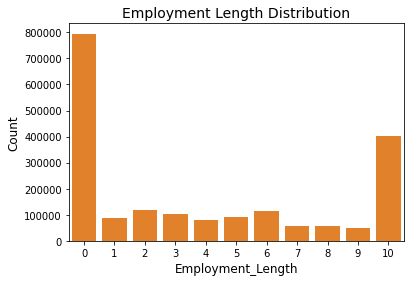

In [ ]:
sns.countplot(data=df, x="Employment_Length", color=sns.color_palette()[1]);
plt.ylabel("Count", size=12)
plt.xlabel("Employment_Length", size=12)
plt.title("Employment Length Distribution", size=14);

### Debt To Income Ratio

In [ ]:
df.query("Debt_To_Income_Ratio < 140").size / df.size

0.9832339411857139

98 % of data have Debt_To_Income_Ratio less than 140.
We are going to observe this 98% of data through histogram.

In [ ]:
bins=np.arange(df['Debt_To_Income_Ratio'].min(), df['Debt_To_Income_Ratio'].max()+5, 5)
plt.hist(data=df, x="Debt_To_Income_Ratio", color=sns.color_palette()[3], bins=bins);
plt.xlim(0,140)
plt.ylabel("Count", size=12)
plt.xlabel("Debt_To_Income_Ratio", size=12)
plt.title("Debt To Income Ratio Distribution", size=14);

### Target

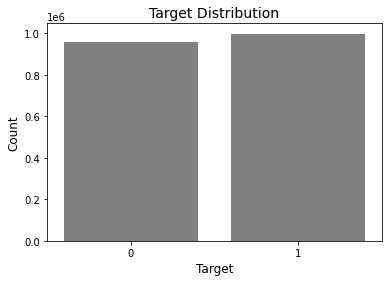

In [ ]:
sns.countplot(data=df, x="Target", color=sns.color_palette()[7]);
plt.ylabel("Count", size=12)
plt.xlabel("Target", size=12)
plt.title("Target Distribution", size=14);

## Bivariate Exploration
**Here plots of Target vs other features will be plotted.**

### Target vs Employment Length

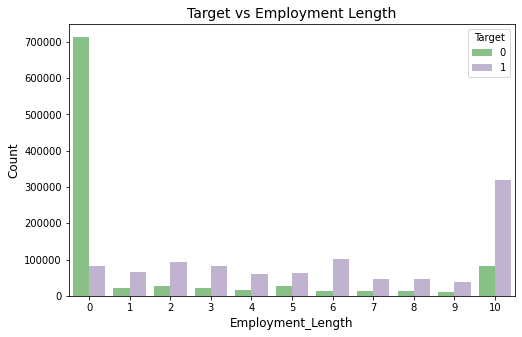

In [ ]:
plt.figure(figsize=[8,5])
sns.countplot(data=df, x="Employment_Length", palette="Accent", hue="Target");
plt.ylabel("Count", size=12)
plt.xlabel("Employment_Length", size=12)
plt.title("Target vs Employment Length", size=14);

### Target vs Risk Score

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


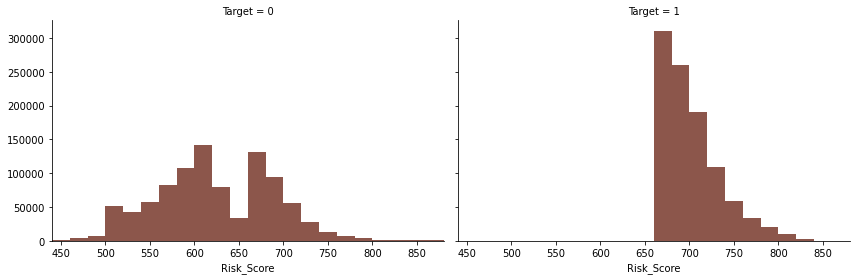

In [ ]:
bins=np.arange(440, 880+20, 20)
g=sns.FacetGrid(data=df, col="Target", size=4, aspect=1.5)
plt.xlim(440,880)
g.map(plt.hist, "Risk_Score", bins=bins, color=sns.color_palette()[5]);

### Target vs Amount Requested

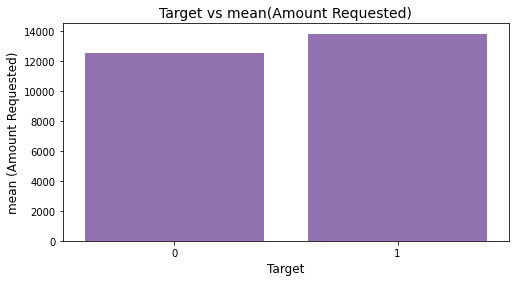

In [ ]:
plt.figure(figsize=[8,4])
sns.barplot(data=df, x="Target", y="Amount_Requested", color=sns.color_palette()[4]);
plt.ylabel("mean (Amount Requested)", size=12);   
plt.xlabel("Target", size=12)
plt.title("Target vs mean(Amount Requested)", size=14);

### Target vs Debt To Income Ratio

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

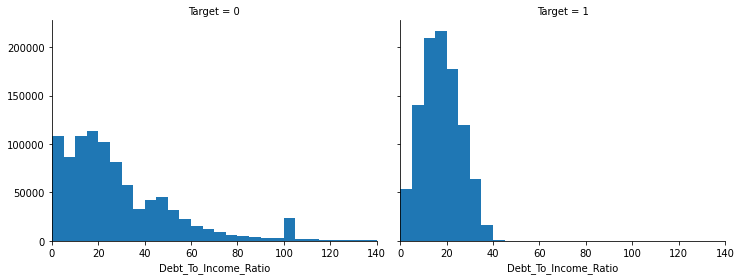

In [ ]:
bins=np.arange(0, 140+5, 5)
plt.figure(figsize=[8,5])
g=sns.FacetGrid(data=df, col="Target", size=4, aspect=1.3);
plt.xlim(0,140);
g.map(plt.hist, "Debt_To_Income_Ratio", bins=bins);

# Splitting our target from rest of features

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Getting test and train datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Applying Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building Models

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)
print()
print(" Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred)*100,2)))

Confusion Matrix : 
[[184120  54872]
 [ 20172 229264]]

 Accuracy Score: 84.64%


K- Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.69 %
Standard Deviation: 0.12 %


## **K- Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion MAtrix : ")
print(cm)
print()
print(" Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred)*100,2)))

Confusion MAtrix : 
[[184747  54245]
 [ 14327 235109]]

 Accuracy Score: 85.96%


K- Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.71 %
Standard Deviation: 0.10 %


Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [4,5,6,7,8,9,10], 'weights':['uniform', 'distance']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format( best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 86.90 %
Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}


## **SVM && Kernel SVM**

In [ ]:
#Taking so much time in Execution
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier.fit(X_train, y_train)

## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)
print()
print(" Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred)*100,2)))

Confusion MAtrix : 
[[125975 113017]
 [     4 249432]]

 Accuracy Score: 76.86%


## **Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)
print()
print(" Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred)*100,2)))

Confusion MAtrix : 
[[194239  44753]
 [ 49535 199901]]

 Accuracy Score: 80.7%


## **Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)
print()
print(" Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Confusion MAtrix : 
[[187806  51186]
 [ 23302 226134]]

 Accuracy Score: 84.75%


K- Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy: 84.86 %
Standard Deviation: 0.12 %


## **XGBoost** 

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)
print()
print(" Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred)*100,2)))

Confusion Matrix : 
[[181361  57631]
 [     3 249433]]

 Accuracy Score: 88.2%


In [ ]:
y_pred=xgb.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[545567, 171786],
       [     5, 747923]])

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy: 84.86 %
Standard Deviation: 0.12 %


K- Fold Cross Validation

## **Catboost**

In [ ]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)
print()
print(" Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix : 
[[181428  57564]
 [   145 249291]]

 Accuracy Score: 88.18%


# Making Pickle File of the model with best Accuracy

In [ ]:
import pickle

In [ ]:
pickle.dump(classifier, open('model.pkl','wb'))